## CARGA DE LIBRERIAS

In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BASE_DIR = os.path.dirname(os.getcwd())
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *

In [2]:
def ratio_convergencia(data, var, col_id='ID_CLIENTE', col_target='TARGET'):
    print("--------------------------------------------------------")
    print("Var", var,":")
    df = data.groupby(
        by=[var], 
        as_index=False
    ).agg(
        {col_id:'count', col_target:'mean'}
    ).rename(
        columns= {col_id:'FREC', col_target: 'RT_CONVERSION'}
    )
    return df

## CARGA DE DATASET

In [3]:
train = pd.read_csv('data/train.csv', **set_parameter_csv)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('data/test.csv', **set_parameter_csv)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
result = pd.read_csv('data/sample_submission.csv', **set_parameter_csv)
result.head()

,Loan_ID,Loan_Status


In [6]:
train.shape, test.shape, result.shape

((614, 13), (367, 12), (0, 2))

In [7]:
null_verificator(train)

,Nulos,Cantidad,Tipo Col,Porcentaje
Loan_ID,False,0,object,0 %
Gender,True,13,object,2.12 %
Married,True,3,object,0.49 %
Dependents,True,15,object,2.44 %
Education,False,0,object,0 %
Self_Employed,True,32,object,5.21 %
ApplicantIncome,False,0,int64,0 %
CoapplicantIncome,False,0,float64,0 %
LoanAmount,True,22,float64,3.58 %
Loan_Amount_Term,True,14,float64,2.28 %


In [8]:
list_percentiles = [0.01, .05,.1, .125,.25, .375, .5, .625, .75, .85, .95, .99]
train.describe(percentiles=list_percentiles)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
1%,1025.000000,0.000000,30.000000,84.00000,0.000000
5%,1897.550000,0.000000,56.000000,180.00000,0.000000
10%,2216.100000,0.000000,71.000000,294.00000,0.000000
12.5%,2373.500000,0.000000,80.000000,360.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
37.5%,3324.750000,0.000000,113.000000,360.00000,1.000000


In [9]:
train.describe(include=['object', 'bool'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001972,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## 'Loan_Status' TO NUMERICA

In [10]:
train['Loan_Status'].value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
dicc_status = {
    'Y': 1, 'N': 0
}
train['Loan_Status'] = train['Loan_Status'].map(dicc_status)

## ANALISIS VARIABLE 'Self_Employed'

In [12]:
train['Self_Employed'].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [13]:
test['Self_Employed'].value_counts(dropna=False)

No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64

In [14]:
dicc_employed = {
    'No': 0,
    'Yes': 1,
}
train['Self_Employed'] = train['Self_Employed'].map(dicc_employed)
test['Self_Employed'] = test['Self_Employed'].map(dicc_employed)
train['Self_Employed'].fillna(-1, inplace=True)
test['Self_Employed'].fillna(-1, inplace=True)

In [15]:
train.pivot_table(
    index = ['Self_Employed'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status         0    1  All
Self_Employed                  
-1.0                9   23   32
0.0               157  343  500
1.0                26   56   82
All               192  422  614

In [16]:
ratio_convergencia(train, 'Self_Employed', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Self_Employed :


,Self_Employed,FREC,RT_CONVERSION
0,-1.0,32,0.718750
1,0.0,500,0.686000
2,1.0,82,0.682927


Self_Employed   -0.011332
dtype: float64


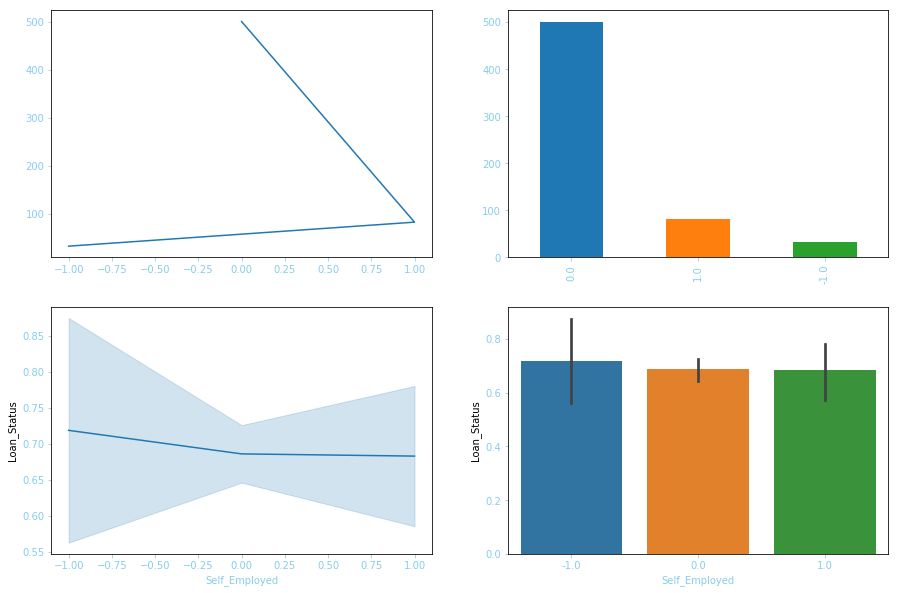

In [17]:
graphs_analysis(train, 'Self_Employed', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE  'Property_Area'

In [18]:
train['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
test['Property_Area'].value_counts(dropna=False)

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Property_Area'])

train['Property_Area'] = le.transform(train['Property_Area'])
test['Property_Area'] = le.transform(test['Property_Area'])

In [21]:
train.pivot_table(
    index = ['Property_Area'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status         0    1  All
Property_Area                  
0                  69  110  179
1                  54  179  233
2                  69  133  202
All               192  422  614

In [22]:
ratio_convergencia(train, 'Property_Area', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Property_Area :


,Property_Area,FREC,RT_CONVERSION
0,0,179,0.614525
1,1,233,0.768240
2,2,202,0.658416


Property_Area    0.032112
dtype: float64


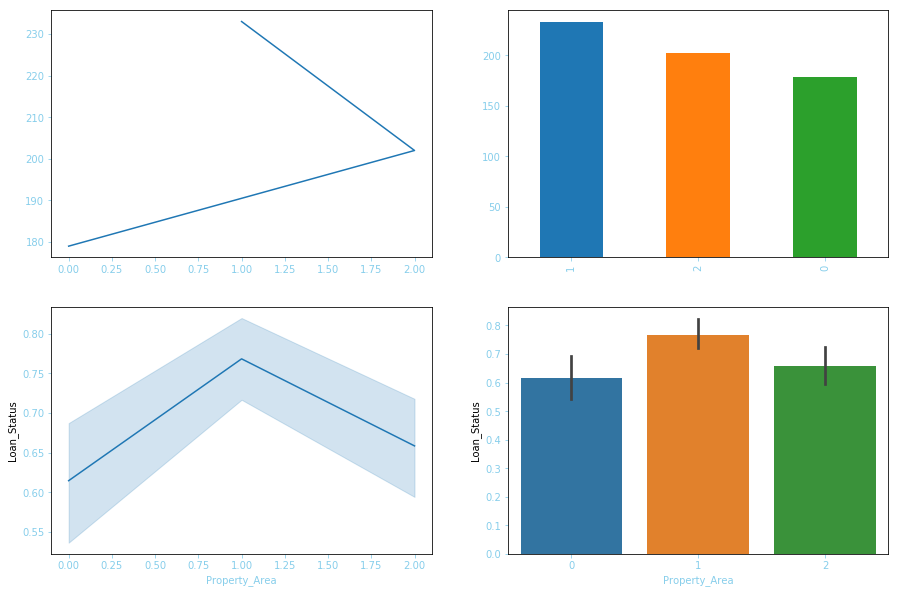

In [23]:
graphs_analysis(train, 'Property_Area', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIBALE 'Education'

In [24]:
train['Education'].value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [25]:
test['Education'].value_counts(dropna=False)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['Education'])
train['Education'] = le.transform(train['Education'])
test['Education'] = le.transform(test['Education'])

In [27]:
train.pivot_table(
    index = ['Education'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status       0    1  All
Education                    
0               140  340  480
1                52   82  134
All             192  422  614

In [28]:
ratio_convergencia(train, 'Education', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Education :


,Education,FREC,RT_CONVERSION
0,0,480,0.708333
1,1,134,0.611940


Education   -0.085884
dtype: float64


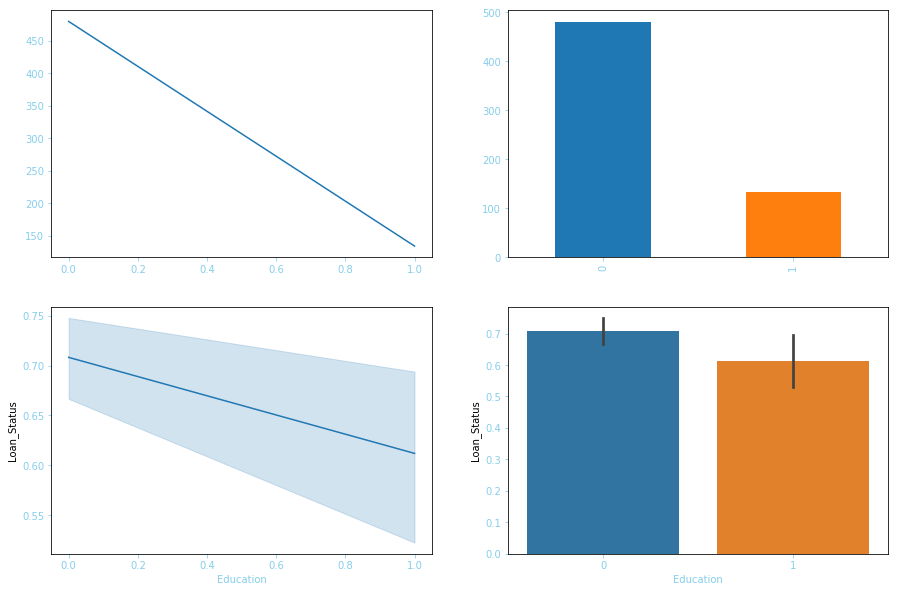

In [29]:
graphs_analysis(train, 'Education', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'Dependents'

In [30]:
train['Dependents'].value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [31]:
test['Dependents'].value_counts(dropna=False)

0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64

In [32]:
dicc_employed = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3,
}
train['Dependents'] = train['Dependents'].map(dicc_employed)
test['Dependents'] = test['Dependents'].map(dicc_employed)
train['Dependents'].fillna(-1, inplace=True)
test['Dependents'].fillna(-1, inplace=True)

In [33]:
train.pivot_table(
    index = ['Dependents'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status       0    1  All
Dependents                   
-1.0              6    9   15
0.0             107  238  345
1.0              36   66  102
2.0              25   76  101
3.0              18   33   51
All             192  422  614

In [34]:
ratio_convergencia(train, 'Dependents', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Dependents :


,Dependents,FREC,RT_CONVERSION
0,-1.0,15,0.600000
1,0.0,345,0.689855
2,1.0,102,0.647059
3,2.0,101,0.752475
4,3.0,51,0.647059


Dependents    0.014263
dtype: float64


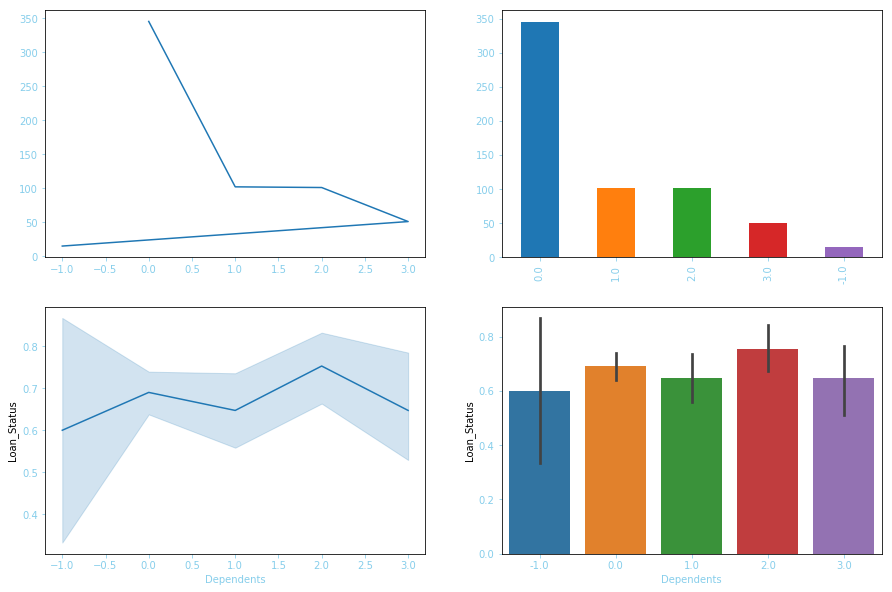

In [35]:
graphs_analysis(train, 'Dependents', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'Married'

In [36]:
train['Married'].value_counts(dropna=False, normalize=True)

Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64

In [37]:
test['Married'].value_counts(dropna=False, normalize=True)

Yes    0.634877
No     0.365123
Name: Married, dtype: float64

In [38]:
dicc_employed = {
    'Yes': 1,
    'No': 0
}
train['Married'] = train['Married'].map(dicc_employed)
test['Married'] = test['Married'].map(dicc_employed)
train['Married'].fillna(-1, inplace=True)

In [39]:
train.pivot_table(
    index = ['Married'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status       0    1  All
Married                      
-1.0              0    3    3
0.0              79  134  213
1.0             113  285  398
All             192  422  614

In [40]:
moda = train['Married'].mode()[0]
train['Married'] = train['Married'].apply(lambda x: moda if x == -1 else x)

In [41]:
ratio_convergencia(train, 'Married', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Married :


,Married,FREC,RT_CONVERSION
0,0.0,213,0.629108
1,1.0,401,0.718204


Married    0.091478
dtype: float64


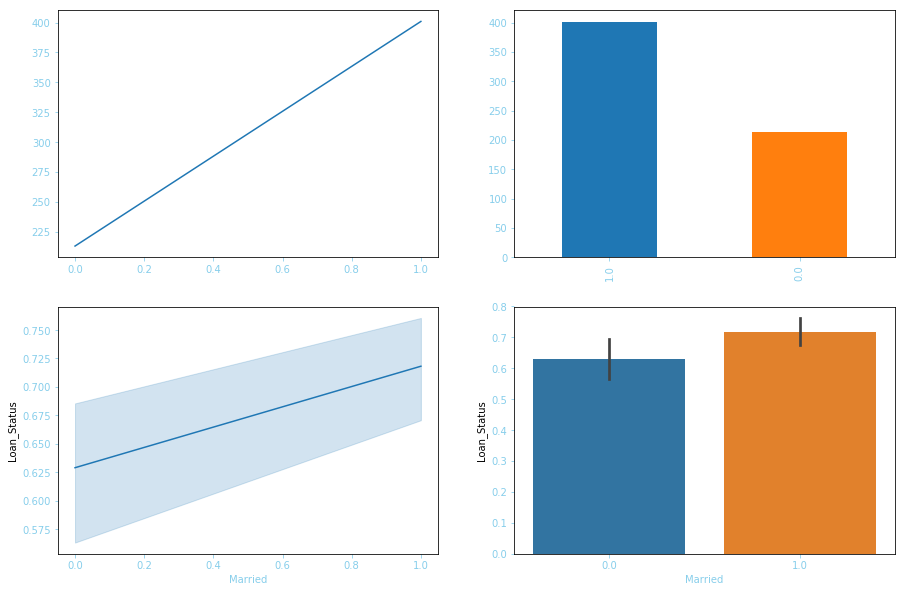

In [42]:
graphs_analysis(train, 'Married', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'Gender'

In [43]:
train['Gender'].value_counts(dropna=False, normalize=True)

Male      0.796417
Female    0.182410
NaN       0.021173
Name: Gender, dtype: float64

In [44]:
test['Gender'].value_counts(dropna=False, normalize=True)

Male      0.779292
Female    0.190736
NaN       0.029973
Name: Gender, dtype: float64

In [45]:
dicc_employed = {
    'Male': 1,
    'Female': 0
}
train['Gender'] = train['Gender'].map(dicc_employed)
test['Gender'] = test['Gender'].map(dicc_employed)
train['Gender'].fillna(-1, inplace=True)
test['Gender'].fillna(-1, inplace=True)

In [46]:
train.pivot_table(
    index = ['Gender'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status       0    1  All
Gender                       
-1.0              5    8   13
0.0              37   75  112
1.0             150  339  489
All             192  422  614

In [47]:
ratio_convergencia(train, 'Gender', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Gender :


,Gender,FREC,RT_CONVERSION
0,-1.0,13,0.615385
1,0.0,112,0.669643
2,1.0,489,0.693252


Gender    0.02904
dtype: float64


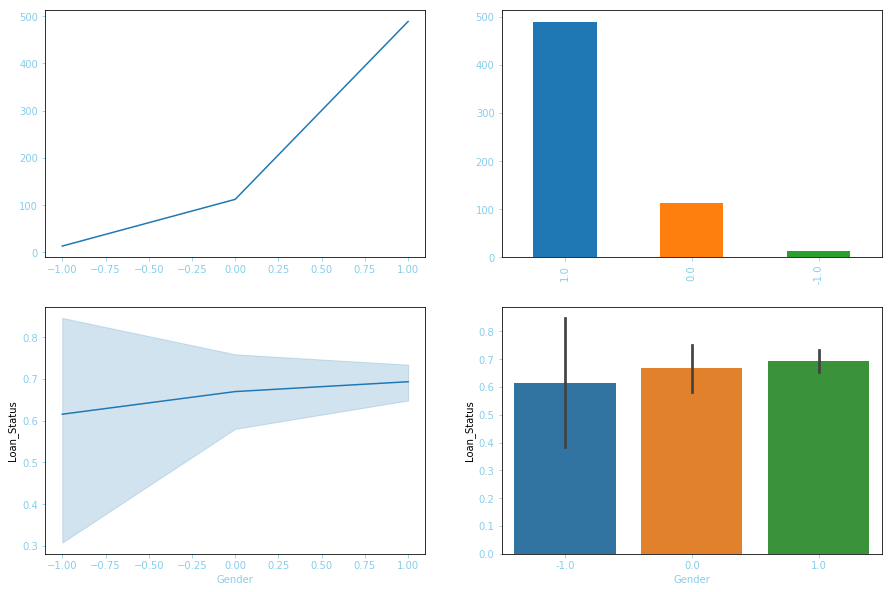

In [48]:
graphs_analysis(train, 'Gender', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'Credit_History'

In [49]:
train['Credit_History'].value_counts(dropna=False, normalize=True)

 1.0    0.773616
 0.0    0.144951
NaN     0.081433
Name: Credit_History, dtype: float64

In [50]:
test['Credit_History'].value_counts(dropna=False, normalize=True)

 1.0    0.760218
 0.0    0.160763
NaN     0.079019
Name: Credit_History, dtype: float64

In [51]:
train['Credit_History'].fillna(-1, inplace=True)
test['Credit_History'].fillna(-1, inplace=True)

In [52]:
train.pivot_table(
    index = ['Credit_History'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status          0    1  All
Credit_History                  
-1.0                13   37   50
0.0                 82    7   89
1.0                 97  378  475
All                192  422  614

In [53]:
ratio_convergencia(train, 'Credit_History', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Credit_History :


,Credit_History,FREC,RT_CONVERSION
0,-1.0,50,0.740000
1,0.0,89,0.078652
2,1.0,475,0.795789


Credit_History    0.280181
dtype: float64


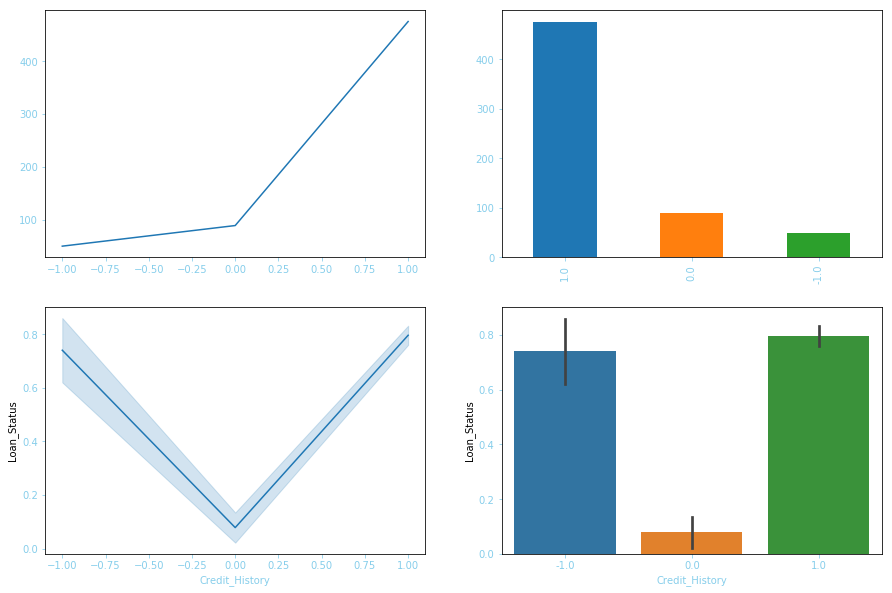

In [54]:
graphs_analysis(train, 'Credit_History', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'Loan_Amount_Term'

In [55]:
train['Loan_Amount_Term'].fillna(0, inplace=True)
test['Loan_Amount_Term'].fillna(0, inplace=True)

In [56]:
train['Loan_Amount_Term'].value_counts(dropna=False, normalize=True).sort_index()*100

0.0       2.280130
12.0      0.162866
36.0      0.325733
60.0      0.325733
84.0      0.651466
120.0     0.488599
180.0     7.166124
240.0     0.651466
300.0     2.117264
360.0    83.387622
480.0     2.442997
Name: Loan_Amount_Term, dtype: float64

In [57]:
test['Loan_Amount_Term'].value_counts(dropna=False, normalize=True).sort_index()*100

0.0       1.634877
6.0       0.272480
12.0      0.272480
36.0      0.272480
60.0      0.272480
84.0      0.817439
120.0     0.272480
180.0     5.994550
240.0     1.089918
300.0     1.907357
350.0     0.272480
360.0    84.741144
480.0     2.179837
Name: Loan_Amount_Term, dtype: float64

In [58]:
train.pivot_table(
    index = ['Loan_Amount_Term'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status            0    1  All
Loan_Amount_Term                  
0.0                    6    8   14
12.0                   0    1    1
36.0                   2    0    2
60.0                   0    2    2
84.0                   1    3    4
120.0                  0    3    3
180.0                 15   29   44
240.0                  1    3    4
300.0                  5    8   13
360.0                153  359  512
480.0                  9    6   15
All                  192  422  614

In [59]:
ratio_convergencia(train, 'Loan_Amount_Term', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var Loan_Amount_Term :


,Loan_Amount_Term,FREC,RT_CONVERSION
0,0.0,14,0.571429
1,12.0,1,1.000000
2,36.0,2,0.000000
3,60.0,2,1.000000
4,84.0,4,0.750000
5,120.0,3,1.000000
6,180.0,44,0.659091
7,240.0,4,0.750000
8,300.0,13,0.615385
9,360.0,512,0.701172


In [60]:
def func_mount(x):
    if x == 0:
        return -1
    
    if x <= 120:
        return 2
    elif x <= 360:
        return 1
    else:
        return 0
train['term_mount_ratio'] = train['Loan_Amount_Term'].apply(func_mount)
test['term_mount_ratio'] = train['Loan_Amount_Term'].apply(func_mount)

In [61]:
ratio_convergencia(train, 'term_mount_ratio', col_id='Loan_ID', col_target='Loan_Status')

--------------------------------------------------------
Var term_mount_ratio :


,term_mount_ratio,FREC,RT_CONVERSION
0,-1,14,0.571429
1,0,15,0.400000
2,1,573,0.696335
3,2,12,0.750000


term_mount_ratio    0.080126
dtype: float64


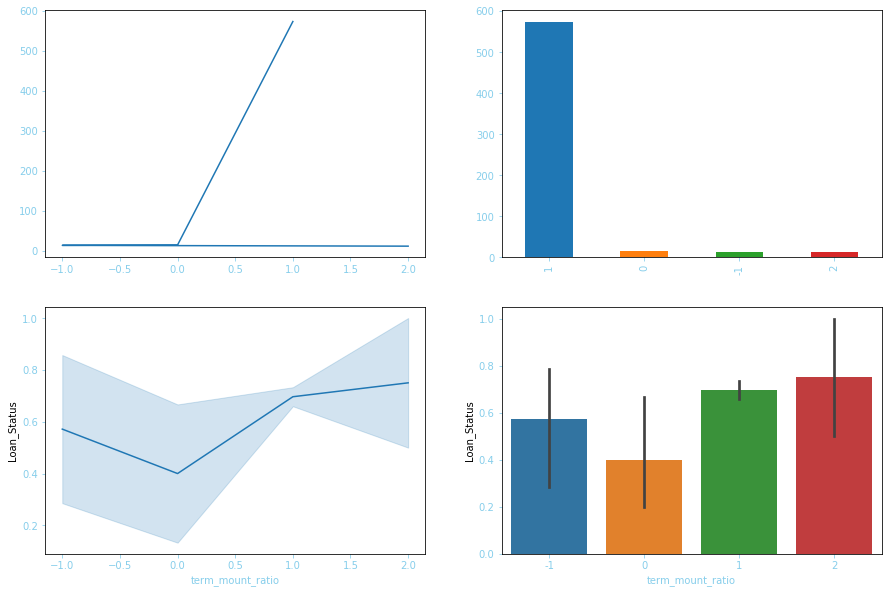

In [62]:
graphs_analysis(train, 'term_mount_ratio', 'Loan_Status', color_label='skyblue')

## ANALISIS VARIABLE 'LoanAmount'

In [63]:
train['LoanAmount'].fillna(0, inplace=True)
test['LoanAmount'].fillna(0, inplace=True)

LoanAmount    0.003402
dtype: float64


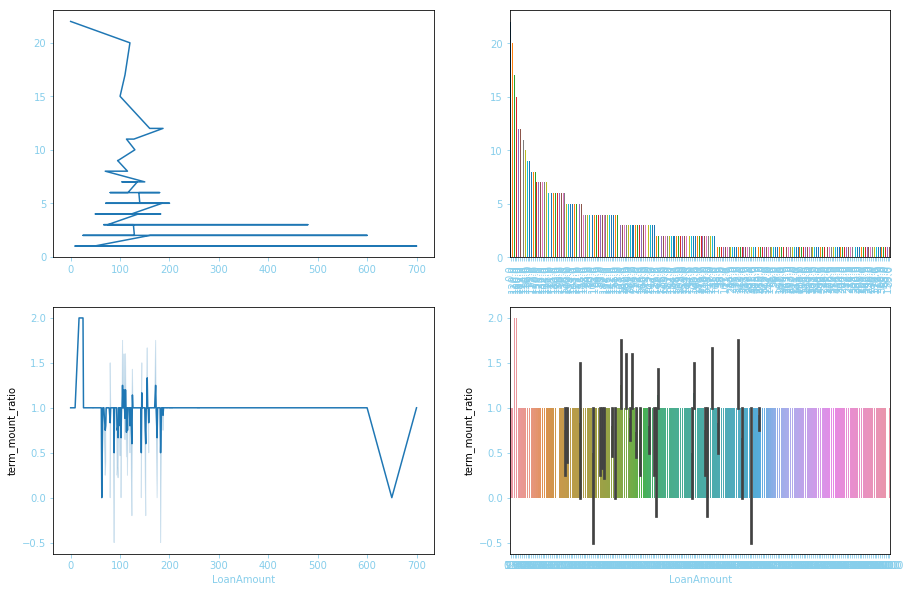

In [64]:
graphs_analysis(train, 'LoanAmount', 'term_mount_ratio', color_label='skyblue')

In [65]:
def mount(x):
    if x <= 200:
        return 1
    elif x <= 600:
        return 2
    else:
        return 3
train['ratio_mount'] = train['LoanAmount'].apply(func_mount)
test['ratio_mount'] = train['LoanAmount'].apply(func_mount)

ratio_mount    0.058851
dtype: float64


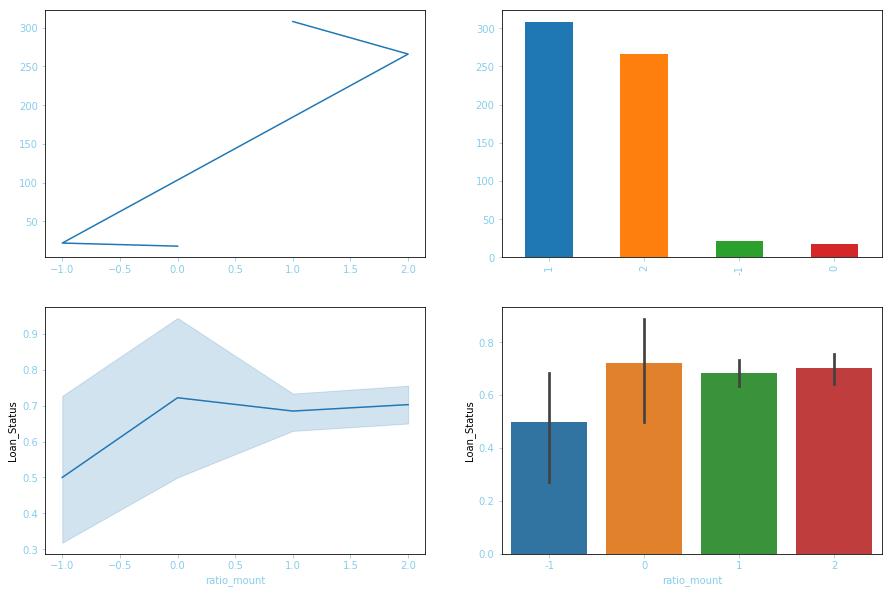

In [66]:
graphs_analysis(train, 'ratio_mount', 'Loan_Status', color_label='skyblue')

ratio_mount   -0.067982
dtype: float64


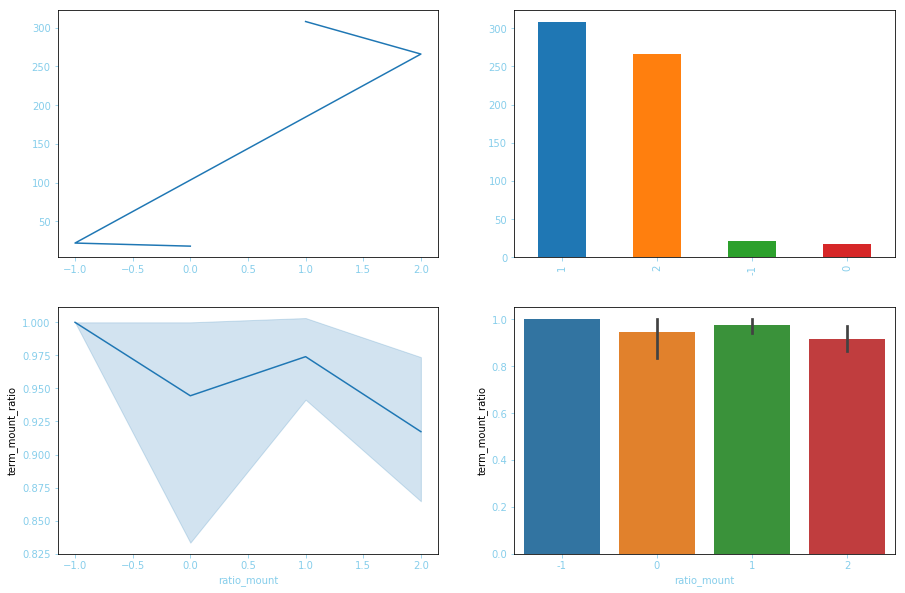

In [67]:
graphs_analysis(train, 'ratio_mount', 'term_mount_ratio', color_label='skyblue')

In [68]:
pd.DataFrame(train['ratio_mount']).corrwith(train['term_mount_ratio'])

ratio_mount   -0.067982
dtype: float64

In [69]:
train['mount_fusion'] = train[['ratio_mount', 'term_mount_ratio']].astype(str).apply(
    lambda x: x[0] + '_' + x[1],axis=1
)

Series([], dtype: float64)


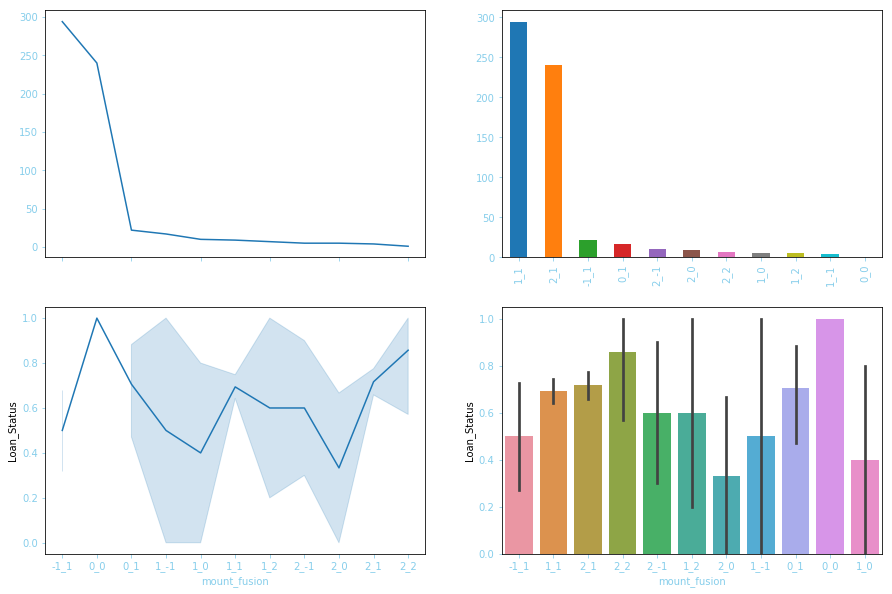

In [70]:
graphs_analysis(train, 'mount_fusion', 'Loan_Status', color_label='skyblue')

In [71]:
test['mount_fusion'] = test[['ratio_mount', 'term_mount_ratio']].astype(str).apply(
    lambda x: x[0] + '_' + x[1],axis=1
)

In [72]:
train.columns.shape, test.columns.shape

((16,), (15,))

## ANALISIS VAR CoapplicantIncome

CoapplicantIncome   -0.059187
dtype: float64


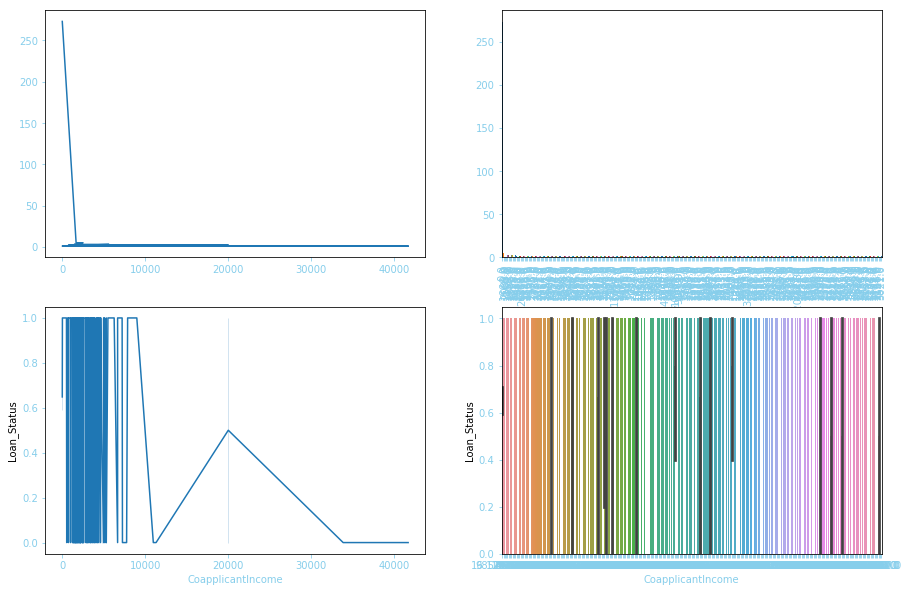

In [73]:
graphs_analysis(train, 'CoapplicantIncome', 'Loan_Status', color_label='skyblue')

In [74]:
train[train['CoapplicantIncome'] > 8000][
    ['CoapplicantIncome', 'Loan_Status']].sort_values(by=['CoapplicantIncome'])

,CoapplicantIncome,Loan_Status
12,8106.0,1
444,8333.0,1
122,8980.0,1
9,10968.0,0
177,11300.0,0
402,20000.0,1
417,20000.0,0
581,33837.0,0
600,41667.0,0


In [75]:
# max_i = 9000
# train['CoapplicantIncome'] = train['CoapplicantIncome'].apply(lambda x: max_i if x > max_i else x)
# test['CoapplicantIncome'] = test['CoapplicantIncome'].apply(lambda x: max_i if x > max_i else x)

In [76]:
train[train['CoapplicantIncome'] == 0].pivot_table(
    index = ['CoapplicantIncome'], 
    columns = ['Loan_Status'], 
    values = ['Loan_ID'], 
    aggfunc = 'count',
    dropna=False, fill_value=0, margins=True
)

Loan_ID          
Loan_Status             0    1  All
CoapplicantIncome                  
0.0                    96  177  273
All                    96  177  273

## ANALISIS LAST VARTIABLE 'ApplicantIncome'


ApplicantIncome   -0.00471
dtype: float64


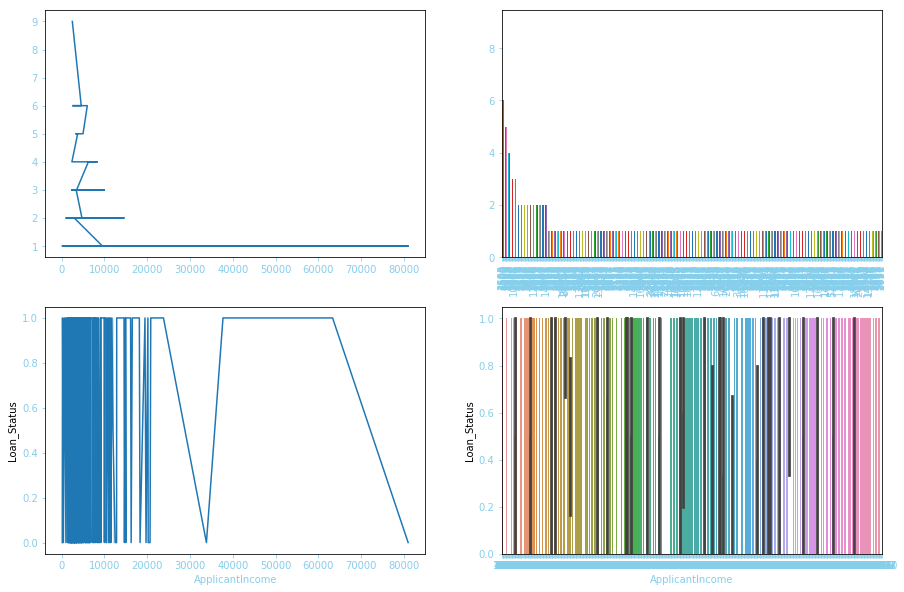

In [77]:
graphs_analysis(train, 'ApplicantIncome', 'Loan_Status', color_label='skyblue')

In [78]:
# max_a = 20000
# train['ApplicantIncome'] = train['ApplicantIncome'].apply(lambda x: max_a if x > max_a else x)
# test['ApplicantIncome'] = test['ApplicantIncome'].apply(lambda x: max_a if x > max_a else x)

## Fusionado columnas categoricas

In [79]:
# Gender 	Married 	Dependents 	Education 	Self_Employed 	Property_Area
lambda_fusion = lambda x: str(x[0]) + '_' + str(x[1])
lambda_fusion_2 = lambda x: str(x[0]) + '_' + str(x[1]) + '_' + str(x[2])

train['gender_self_employed_fusion'] = train[
    ['Gender', 'Self_Employed']].astype(int).apply(lambda_fusion, axis=1)

train['gender_married_fusion'] = train[
    ['Gender', 'Married']].astype(int).apply(lambda_fusion, axis=1)

train['property_area_self_employed_fusion'] = train[
    ['Property_Area', 'Self_Employed']].astype(int).apply(lambda_fusion, axis=1)
train['education_gender_fusion'] = train[
    ['Gender', 'Education']].astype(int).apply(lambda_fusion, axis=1)

train['gender_married_dependents_fusion'] = train[
    ['Gender', 'Married','Dependents']].astype(int).apply(lambda_fusion_2, axis=1)

test['gender_self_employed_fusion'] = test[['Gender', 'Self_Employed']].astype(
    int).apply(lambda_fusion, axis=1)
test['gender_married_fusion'] = test[['Gender', 'Married']].astype(
    int).apply(lambda_fusion, axis=1)
test['property_area_self_employed_fusion'] = test[['Property_Area', 'Self_Employed']].astype(
    int).apply(lambda_fusion, axis=1)
test['education_gender_fusion'] = test[['Gender', 'Education']].astype(
    int).apply(lambda_fusion, axis=1)
test['gender_married_dependents_fusion'] = test[['Gender', 'Married','Dependents']].astype(
    int).apply(lambda_fusion_2, axis=1)

Series([], dtype: float64)


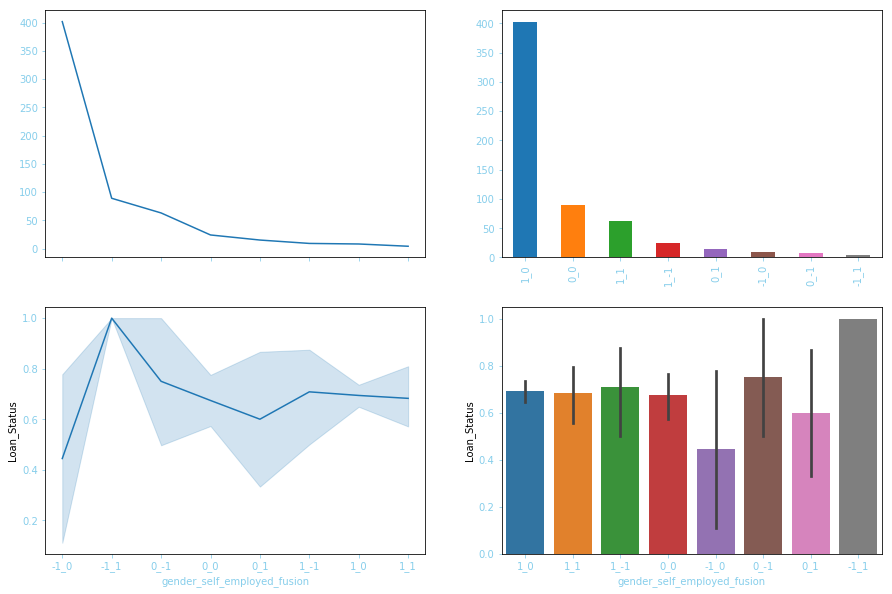

In [80]:
graphs_analysis(train, 'gender_self_employed_fusion', 'Loan_Status', color_label='skyblue')

Series([], dtype: float64)


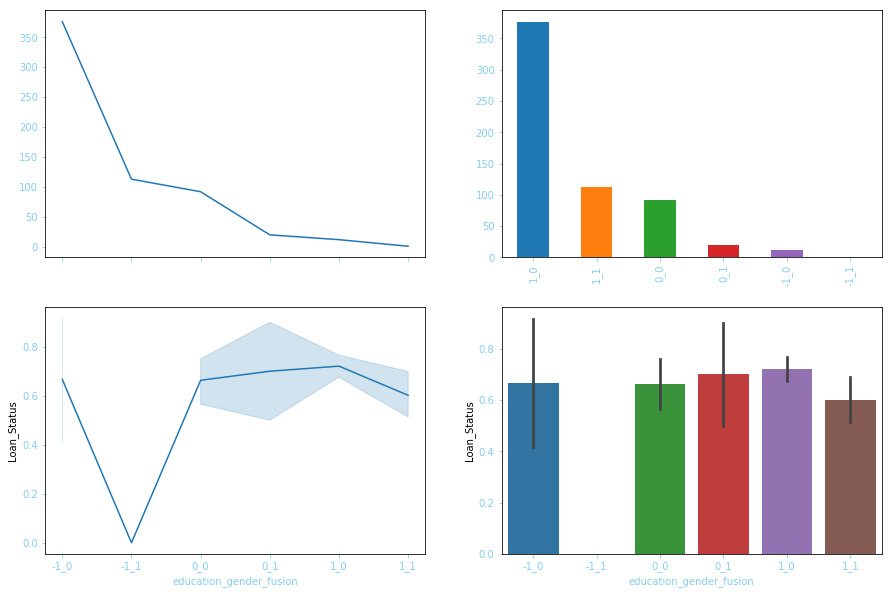

In [81]:
graphs_analysis(train, 'education_gender_fusion', 'Loan_Status', color_label='skyblue')

Series([], dtype: float64)


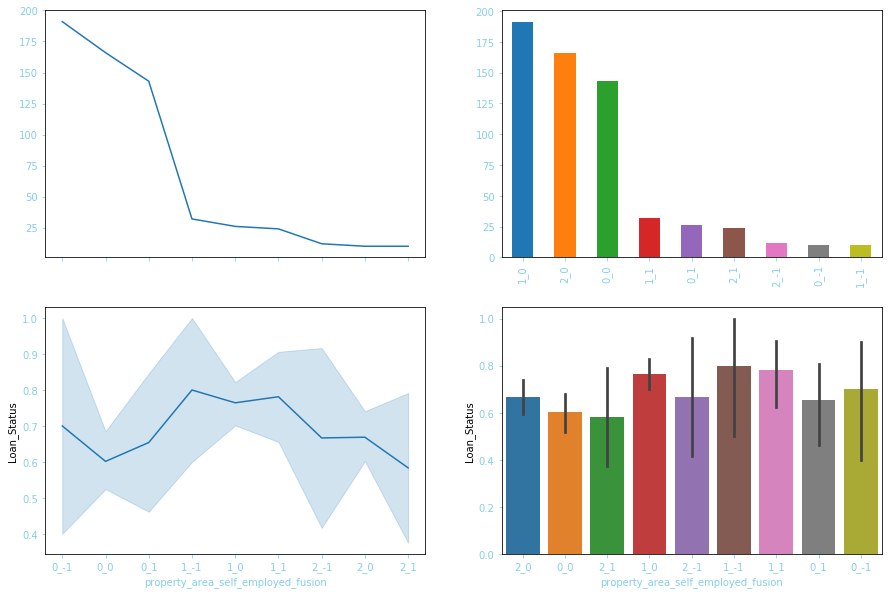

In [82]:
graphs_analysis(train, 'property_area_self_employed_fusion', 'Loan_Status', color_label='skyblue')

Series([], dtype: float64)


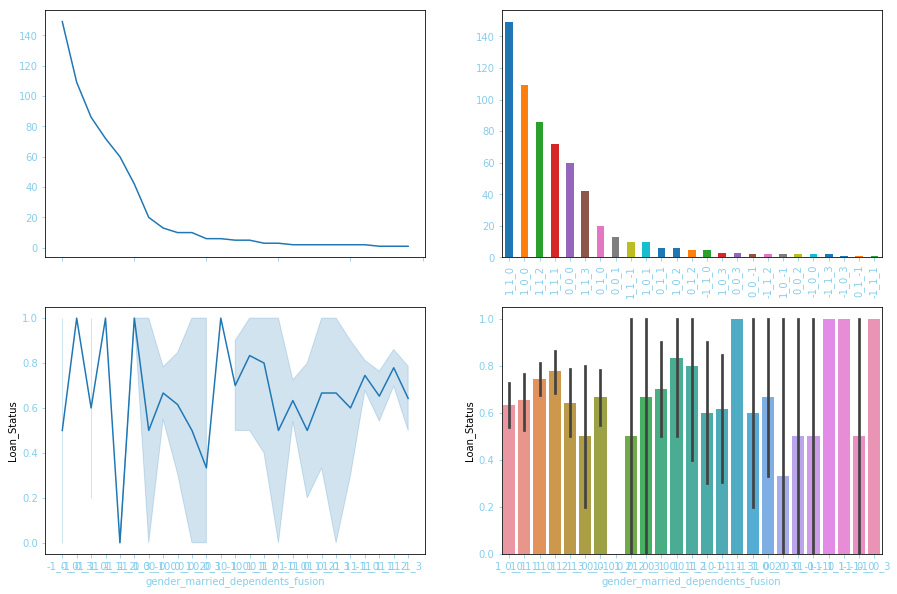

In [83]:
graphs_analysis(train, 'gender_married_dependents_fusion', 'Loan_Status', color_label='skyblue')

In [84]:
def corr_detail(df_corr, min_value=0.75):
    from itertools import combinations
    def add_dicc(key, val, num, dicc):
        if key in dicc:
            dicc[key].append((val, num))
        else:
            dicc[key] = [(val, num)]
        
    set_unique, list_detected = set(), []
    dicc_detected = {}
    

    for cols in combinations(list(df_corr.columns), 2):
        corr_columns = np.fabs(matriz_corr[cols[0]][cols[1]])
        if corr_columns > min_value:
            set_unique.update(cols)
            list_detected.extend(list(cols))
            add_dicc(cols[0], cols[1], corr_columns, dicc_detected)
            add_dicc(cols[1], cols[0], corr_columns, dicc_detected)        
            
    print("ANALISIS CORRELACION ENTRE COLUMNAS :")
    
    for colc, cant in sorted(
        [(col, list_detected.count(col)) for col in set_unique], key=lambda _: _[1], reverse=True):
        print("/"*30)
        print("-> ", colc, cant)
        for _ in dicc_detected[colc]:
            print(" "*10, *_)
    del dicc_detected
    del list_detected
    del set_unique

In [85]:
null_verificator(train)

'DATA LIMPIA DE NULOS'

In [86]:
cols_str = list(train.select_dtypes(include=['object']).columns)[1:]
cols_str

['mount_fusion',
 'gender_self_employed_fusion',
 'gender_married_fusion',
 'property_area_self_employed_fusion',
 'education_gender_fusion',
 'gender_married_dependents_fusion']

In [87]:
for col in cols_str:
    print(list(train[col].unique()) + list(test[col].unique()))

['-1_1', '1_1', '2_1', '2_2', '2_-1', '1_2', '2_0', '1_-1', '0_1', '0_0', '1_0', '-1_1', '1_1', '2_1', '2_2', '2_-1', '1_2', '2_0', '1_-1', '0_1', '0_0', '1_0']
['1_0', '1_1', '1_-1', '0_0', '-1_0', '0_-1', '0_1', '-1_1', '1_0', '1_1', '0_0', '1_-1', '-1_0', '0_-1', '0_1', '-1_1']
['1_0', '1_1', '0_0', '-1_1', '0_1', '-1_0', '1_1', '1_0', '0_0', '-1_0', '-1_1', '0_1']
['2_0', '0_0', '2_1', '1_0', '2_-1', '1_-1', '1_1', '0_1', '0_-1', '2_0', '2_1', '1_0', '0_0', '2_-1', '1_-1', '1_1', '0_1', '0_-1']
['1_0', '1_1', '0_0', '-1_1', '0_1', '-1_0', '1_0', '1_1', '0_1', '0_0', '-1_0', '-1_1']
['1_0_0', '1_1_1', '1_1_0', '1_1_2', '1_1_3', '1_0_1', '0_0_0', '-1_1_2', '0_0_2', '1_0_3', '0_1_0', '0_1_1', '0_1_2', '1_1_-1', '0_0_1', '-1_1_3', '-1_1_0', '1_0_2', '0_0_3', '0_0_-1', '1_0_-1', '-1_1_1', '0_1_-1', '-1_0_0', '-1_0_3', '1_1_0', '1_1_1', '1_1_2', '1_0_0', '0_0_1', '1_0_3', '0_0_0', '1_0_1', '1_1_3', '0_0_3', '-1_0_0', '1_1_-1', '-1_1_3', '0_1_2', '0_0_2', '0_0_-1', '0_1_0', '1_0_2', '0_1_

In [88]:
for col in cols_str:
    print('>> ', col.upper())
    le = preprocessing.LabelEncoder()
    le.fit(list(train[col].unique()) + list(test[col].unique()))

    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

>>  MOUNT_FUSION
>>  GENDER_SELF_EMPLOYED_FUSION
>>  GENDER_MARRIED_FUSION
>>  PROPERTY_AREA_SELF_EMPLOYED_FUSION
>>  EDUCATION_GENDER_FUSION
>>  GENDER_MARRIED_DEPENDENTS_FUSION


In [89]:
train.dtypes

Loan_ID                                object
Gender                                float64
Married                               float64
Dependents                            float64
Education                               int64
Self_Employed                         float64
ApplicantIncome                         int64
CoapplicantIncome                     float64
LoanAmount                            float64
Loan_Amount_Term                      float64
Credit_History                        float64
Property_Area                           int64
Loan_Status                             int64
term_mount_ratio                        int64
ratio_mount                             int64
mount_fusion                            int64
gender_self_employed_fusion             int64
gender_married_fusion                   int64
property_area_self_employed_fusion      int64
education_gender_fusion                 int64
gender_married_dependents_fusion        int64
dtype: object

In [90]:
def serie_ratio_convergencia(data, var, col_target='TARGET'):
    df = data.groupby(
        by=[var]
    ).mean()[col_target]
    del df.index.name
    return df

In [96]:
def replace_value_ratio(train, test, lista_vars, col_target='target'):
    for var in lista_vars:
        print('>> ', var.upper())
        serie_ratio = serie_ratio_convergencia(
            train, var, col_target=col_target
        )
        print(train[var].unique())
        print(test[var].unique())
        train[var] = train[var].apply(lambda x: serie_ratio.get(x, 0))
        test[var] = test[var].apply(lambda x: serie_ratio.get(x, 0))
    return train, test

In [92]:
lista_strr = [
    'mount_fusion',
    'gender_self_employed_fusion',
    'gender_married_fusion',
    'property_area_self_employed_fusion',
    'education_gender_fusion',
    'gender_married_dependents_fusion',
    'Gender',
    'Married', 
    'Dependents', 
    'Education',  
    'Self_Employed', 
    'Credit_History',
    'Property_Area',
    'ratio_mount',
    'term_mount_ratio'
]

In [97]:
train, test = replace_value_ratio(train, test, lista_strr, col_target='Loan_Status')

>>  MOUNT_FUSION
[0.5        0.69387755 0.71666667 0.85714286 0.6        0.33333333
 0.70588235 1.         0.4       ]
[0.5        0.69387755 0.71666667 0.85714286 0.6        0.33333333
 0.70588235 1.         0.4       ]
>>  GENDER_SELF_EMPLOYED_FUSION
[0.69402985 0.68253968 0.70833333 0.6741573  0.44444444 0.75
 0.6        1.        ]
[0.69402985 0.68253968 0.6741573  0.70833333 0.44444444 0.75
 0.6        1.        ]
>>  GENDER_MARRIED_FUSION
[0.62307692 0.71866295 0.6375     0.6        0.75       0.66666667]
[0.71866295 0.62307692 0.6375     0.66666667 0.6        0.75      ]
>>  PROPERTY_AREA_SELF_EMPLOYED_FUSION
[0.6686747  0.6013986  0.58333333 0.76439791 0.66666667 0.8
 0.78125    0.65384615 0.7       ]
[0.6686747  0.58333333 0.76439791 0.6013986  0.66666667 0.8
 0.78125    0.65384615 0.7       ]
>>  EDUCATION_GENDER_FUSION
[0.72074468 0.60176991 0.66304348 0.         0.7        0.66666667]
[0.72074468 0.60176991 0.7        0.66304348 0.66666667 0.        ]
>>  GENDER_MARRIED_DEP

In [99]:
train[lista_strr].head()

,mount_fusion,gender_self_employed_fusion,gender_married_fusion,property_area_self_employed_fusion,education_gender_fusion,gender_married_dependents_fusion,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ratio_mount,term_mount_ratio
0,0.500000,0.69403,0.623077,0.668675,0.720745,0.633028,0.693252,0.629108,0.689855,0.708333,0.686000,0.795789,0.658416,0.500000,0.696335
1,0.693878,0.69403,0.718663,0.601399,0.720745,0.652778,0.693252,0.718204,0.647059,0.708333,0.686000,0.795789,0.614525,0.685065,0.696335
2,0.716667,0.68254,0.718663,0.583333,0.720745,0.744966,0.693252,0.718204,0.689855,0.708333,0.682927,0.795789,0.658416,0.703008,0.696335
3,0.716667,0.69403,0.718663,0.668675,0.601770,0.744966,0.693252,0.718204,0.689855,0.611940,0.686000,0.795789,0.658416,0.703008,0.696335
4,0.693878,0.69403,0.623077,0.668675,0.720745,0.633028,0.693252,0.629108,0.689855,0.708333,0.686000,0.795789,0.658416,0.685065,0.696335


In [98]:
test[lista_strr].head()

,mount_fusion,gender_self_employed_fusion,gender_married_fusion,property_area_self_employed_fusion,education_gender_fusion,gender_married_dependents_fusion,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ratio_mount,term_mount_ratio
0,0.500000,0.69403,0.718663,0.668675,0.720745,0.0,0.693252,0.718204,0.689855,0.708333,0.686,0.795789,0.658416,0.500000,0.696335
1,0.693878,0.69403,0.718663,0.668675,0.720745,0.0,0.693252,0.718204,0.647059,0.708333,0.686,0.795789,0.658416,0.685065,0.696335
2,0.716667,0.69403,0.718663,0.668675,0.720745,0.0,0.693252,0.718204,0.752475,0.708333,0.686,0.795789,0.658416,0.703008,0.696335
3,0.716667,0.69403,0.718663,0.668675,0.720745,0.0,0.693252,0.718204,0.752475,0.708333,0.686,0.740000,0.658416,0.703008,0.696335
4,0.693878,0.69403,0.623077,0.668675,0.601770,0.0,0.693252,0.629108,0.689855,0.611940,0.686,0.795789,0.658416,0.685065,0.696335


In [100]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'term_mount_ratio', 'ratio_mount', 'mount_fusion',
       'gender_self_employed_fusion', 'gender_married_fusion',
       'property_area_self_employed_fusion', 'education_gender_fusion',
       'gender_married_dependents_fusion'],
      dtype='object')

In [101]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'term_mount_ratio', 'ratio_mount', 'mount_fusion',
       'gender_self_employed_fusion', 'gender_married_fusion',
       'property_area_self_employed_fusion', 'education_gender_fusion',
       'gender_married_dependents_fusion'],
      dtype='object')

In [102]:
train.to_csv('data/train_clean.scv', index=False)
test.to_csv('data/test_clean.scv', index=False)